This jupyter notebook will help us in creating graphs and charts for our results. It will have basic functionality to calculate speedup and efficiency

In [92]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
# loop through a list of threaded results and compare to sequential execution to find a df of threads, avg, sppedup, and efficiency
def calc_speedup(seq_list, thread_lists):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  print('Sequential Execution time average: ', seqAvg)

  num_of_threads = 0
  results = []
  result_names = ['Threads', 'STD', 'Avg', 'Speedup', 'Efficiency']

  for thread_list in thread_lists:
    # Remove max and min for current list
    thread_list.remove(max(thread_list))
    thread_list.remove(min(thread_list))

    num_of_threads += 1
    thread_avg = round(np.average(thread_list), 3)
    speedup = round(seqAvg/thread_avg, 3)
    efficiency = round(speedup/num_of_threads, 3)
    standard_dev = round(np.std(thread_list), 5)
    results.append([num_of_threads, standard_dev, thread_avg, speedup, efficiency])

  df = pandas.DataFrame(results, columns=result_names)  
  return df

In [3]:
# Will take a dataframe with Avg, Speedup, and Efficiency and plot them
def plot_speedup(df):
  ax = plt.gca() 
  df.plot(kind = 'line', x = 'Threads', y = 'Avg', color = 'green', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'orange', ax = ax)
  plt.show();

In [4]:
# Will take a list of sequential results and return the average of the list
def avg(seq_list):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  return seqAvg

In [ ]:
# read in ISD.txt file and plot the data (not doing anything with this info, just good to see that it's working)
isd = pandas.read_csv('ISD.txt', sep = '\t')
isd.columns = ['STEP', 'ISD']
isd.plot(x = 'STEP', y = 'ISD')
plt.show()

In [169]:
# Initial sequential results for the 3 dataset sizes
# 1 threads for nmf -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823,
# 1 threads for nmf -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105,
# 1 threads for nmf -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280,

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

small_seq_avg = avg(small_seq)
med_seq_avg = avg(med_seq)
large_seq_avg = avg(large_seq)

avg(small_seq), avg(med_seq), avg(large_seq)

(0.5396273333333333, 9.215544333333334, 63.970501000000006)

In [170]:
# 1 threads for nmfOpt -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.543822, 0.531809, 0.548124, 0.533890, 0.540467, 0.532196, 0.541848,
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 9.229090, 9.291666, 9.230644, 9.218279, 9.229078, 9.248790, 9.318863,
# 1 threads for nmfOpt -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 65.951206, 64.987674, 73.200234, 63.944160, 59.638567, 59.946920, 59.737356,

# small ds results for nmfOpt
small_opt_seq = [0.543822, 0.531809, 0.548124, 0.533890, 0.540467, 0.532196, 0.541848]
print(avg(small_opt_seq))

# medium ds results for nmfOpt 
medium_opt_seq = [9.229090, 9.291666, 9.230644, 9.218279, 9.229078, 9.248790, 9.318863]
print(avg(medium_opt_seq))

# large ds results for nmfOpt
large_opt_seq = [65.951206, 64.987674, 73.200234, 63.944160, 59.638567, 59.946920, 59.737356]
print(avg(large_opt_seq))

small_opt_avg = avg(small_opt_seq)
med_opt_avg = avg(medium_opt_seq)
large_opt_avg = avg(large_opt_seq)


0.5384445999999999
9.2458536
62.9134632


In [171]:
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.469163, 0.469064, 0.466861, 0.466480, 0.470035, 0.469498, 0.460609,
# 1 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.470409, 8.418149, 8.396870, 8.404019, 8.497173, 8.474077, 8.616347,
# 1 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 62.672241, 60.503757, 56.855478, 54.885818, 68.855429, 65.637925, 68.166724

# small ds results for nmfPar single thread
small_par_seq = [0.469163, 0.469064, 0.466861, 0.466480, 0.470035, 0.469498, 0.460609]
print(avg(small_par_seq))

# medium ds results for nmfPar
med_par_seq = [8.470409, 8.418149, 8.396870, 8.404019, 8.497173, 8.474077, 8.616347]
print(avg(med_par_seq))

# large ds results for nmfPar
large_par_seq = [62.672241, 60.503757, 56.855478, 54.885818, 68.855429, 65.637925, 68.166724]
print(avg(large_par_seq))

small_par_avg = avg(small_par_seq)
med_par_avg = avg(med_par_seq)
large_par_avg = avg(large_par_seq)


0.4682132
8.4527654
62.767224999999996


In [180]:
# 1 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.474818, 0.466582, 0.470384, 0.465153, 0.464043, 0.461633, 0.472211,
# 1 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.319112, 8.260336, 8.354723, 8.289532, 8.498767, 8.299560, 8.308817,
# 1 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.395836, 62.303134, 54.345636, 61.621909, 65.504819, 56.686520, 55.247727,

# small ds results for nmfOptPar single thread
small_optpar_seq = [0.474818, 0.466582, 0.470384, 0.465153, 0.464043, 0.461633, 0.472211]
print(avg(small_optpar_seq))

# medium ds results for nmfOptPar
medium_optpar_seq = [8.319112, 8.260336, 8.354723, 8.289532, 8.498767, 8.299560, 8.308817]
print(avg(medium_optpar_seq))

# large ds results for nmfOptPar
large_optpar_seq = [54.395836, 62.303134, 54.345636, 61.621909, 65.504819, 56.686520, 55.247727]
print(avg(large_optpar_seq))

small_optpar_avg = avg(small_optpar_seq)
med_optpar_avg = avg(medium_optpar_seq)
large_optpar_avg = avg(large_optpar_seq)


0.46767459999999994
8.3143488
58.051025200000005


In [190]:
# 1 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.498368, 0.494647, 0.493262, 0.505846, 0.499952, 0.499123, 0.509280,
# 1 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.305348, 8.274566, 8.306281, 8.327517, 8.305201, 8.298547, 8.254776,
# 1 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.372472, 65.503320, 63.422626, 63.501059, 54.576573, 54.590909, 57.717027,

# small ds results for nmfVec single thread
small_vec_seq = [0.498368, 0.494647, 0.493262, 0.505846, 0.499952, 0.499123, 0.509280]
print(avg(small_vec_seq))

# medium ds results for nmfVec
med_vec_seq = [8.305348, 8.274566, 8.306281, 8.327517, 8.305201, 8.298547, 8.254776]
print(avg(med_vec_seq))

# large ds results for nmfVec
large_vec_seq = [54.372472, 65.503320, 63.422626, 63.501059, 54.576573, 54.590909, 57.717027]
print(avg(large_vec_seq))

small_vec_avg = avg(small_vec_seq)
med_vec_avg = avg(med_vec_seq)
large_vec_avg = avg(large_vec_seq)

0.4995872
8.2979886
58.7616388


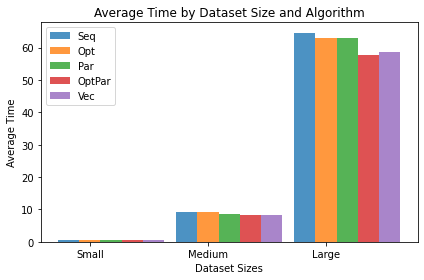

In [192]:
# Plot all the avg results for seq, opt, par, and optpar together using the average results from above
average_times = {
    'Seq': {'Small': small_seq_avg, 'Medium': med_seq_avg, 'Large': large_seq_avg},
    'Opt': {'Small': small_opt_avg, 'Medium': med_opt_avg, 'Large': large_opt_avg},
    'Par': {'Small': small_par_avg, 'Medium': med_par_avg, 'Large': large_par_avg},
    'OptPar': {'Small': small_optpar_avg, 'Medium': med_optpar_avg, 'Large': large_optpar_avg},
    'Vec': {'Small': small_vec_avg, 'Medium': med_vec_avg, 'Large': large_vec_avg},
}

dataset_sizes = ['Small', 'Medium', 'Large']

bar_width = 0.18
opacity = 0.8

index = np.arange(len(dataset_sizes))

for i, (algo, times) in enumerate(average_times.items()):
    plt.bar(index + i * bar_width, times.values(), bar_width,
            alpha=opacity, label=algo)

plt.xlabel('Dataset Sizes')
plt.ylabel('Average Time')
plt.title('Average Time by Dataset Size and Algorithm')
plt.xticks(index + bar_width, dataset_sizes)
plt.legend()

plt.tight_layout()
plt.show()

0.5419072 0.552068 0.5425760000000001 0.5380942 0.5385568 0.5399655999999999 0.5474943999999999 0.5349756000000001 0.5357484 0.5321187999999999 0.5412319999999999


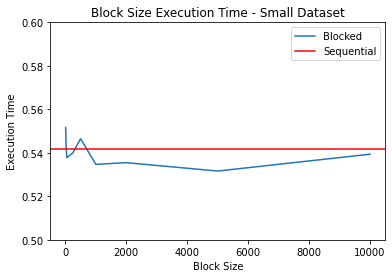

In [206]:
# small ds results for nmfOpt - blocking
seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
par10 = [0.550422, 0.550338, 0.547757, 0.556342, 0.548995, 0.558231, 0.554243]
par25 = [0.539496, 0.547106, 0.546138, 0.540328, 0.544313, 0.535382, 0.542605]
par50 = [0.541280, 0.538336, 0.536130, 0.545493, 0.538739, 0.535981, 0.535986]
par100 = [0.546231, 0.530213, 0.543186, 0.534009, 0.534886, 0.543913, 0.536790]
par250 = [0.554449, 0.536993, 0.531711, 0.539495, 0.533229, 0.543633, 0.546478]
par500 = [0.540102, 0.532589, 0.537161, 0.541972, 0.567119, 0.560839, 0.557398]
par1000 = [0.534457, 0.535191, 0.532827, 0.537962, 0.534441, 0.539641, 0.531159]
par2000 = [0.536564, 0.539811, 0.534647, 0.537961, 0.533593, 0.534342, 0.535228]
par5000 = [0.530662, 0.535121, 0.535085, 0.530814, 0.531821, 0.529611, 0.532212]
par10000 = [0.537150, 0.534218, 0.536364, 0.533799, 0.544581, 0.553847, 0.563479]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# add a constant line with the sequential execution time to the plot
plt.ylim(.5, .6)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Small Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

9.4422076 9.540960799999999 9.378895600000002 9.391796 9.3637678 9.3725704 9.347297000000001 9.438360800000002 9.458645 9.3526032 9.450391


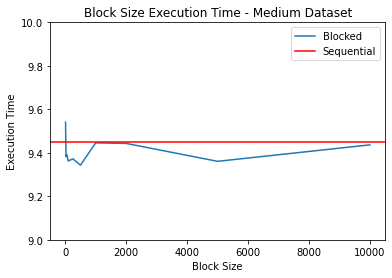

In [209]:
# medium ds results for nmfOpt - blocking
seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
par10 = [9.450070, 9.591811, 9.599302, 9.527902, 12.228987, 9.482738, 9.503051]
par25 = [9.486993, 9.320670, 9.428383, 9.419038, 9.318298, 9.408089, 9.269470]
par50 = [9.433731, 9.561377, 9.322494, 9.361047, 9.436499, 9.348331, 9.379372]
par100 = [9.460760, 9.281239, 9.436277, 9.313866, 9.336958, 9.437411, 9.294327]
par250 = [9.353697, 9.593345, 9.336391, 9.409245, 9.358116, 9.311966, 9.405403]
par500 = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762]
par1000 = [9.380692, 9.473661, 9.434264, 9.338804, 9.456218, 9.621502, 9.446969]
par2000 = [9.584038, 9.379365, 9.608558, 9.449350, 9.333862, 9.474474, 9.405998]
par5000 = [9.396626, 9.283757, 9.275909, 9.497640, 9.343070, 9.375007, 9.364556]
par10000 = [9.300772, 9.455358, 9.615612, 9.444692, 9.546060, 9.396048, 9.409797]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(9, 10)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Medium Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

64.0224332 60.8154756 62.229225 60.5727032 60.540280800000005 60.517412 60.9396588 61.2019142 62.127784000000005 60.779240400000006 60.6673186


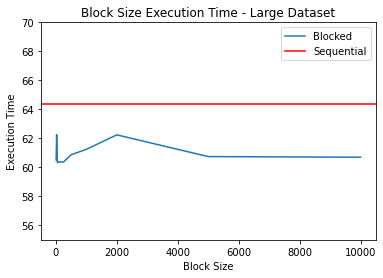

In [211]:
# large ds results for nmfOpt - blocking
seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
par10 = [60.343254, 60.561474, 60.449829, 62.190076, 60.301975, 60.532745, 62.227841]
par25 = [63.361837, 65.885473, 60.655988, 60.592889, 63.790693, 60.580615, 62.744718]
par50 = [64.132692, 60.386337, 60.141502, 60.161332, 60.417069, 60.083275, 61.757276]
par100 = [60.318428, 60.414053, 60.171394, 61.296319, 61.851624, 60.264112, 60.408492]
par250 = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910]
par500 = [60.314595, 61.117702, 61.756292, 60.340996, 63.036884, 61.125936, 60.357368]
par1000 = [61.227422, 60.354767, 60.306954, 62.765614, 61.834360, 60.654657, 61.938365]
par2000 = [60.613229, 63.260377, 63.451489, 60.436812, 64.865226, 62.845308, 60.468517]
par5000 = [60.095884, 60.554738, 65.304430, 61.575913, 60.762393, 59.960676, 60.907274]
par10000 = [61.029667, 62.605819, 60.816393, 60.217176, 60.193416, 60.315100, 60.958257]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(55, 70)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Large Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

In [95]:
import math

def calc_mean_and_variance(df):
    df_cols = ['iter_0', 'iter_1', 'iter_2', 'iter_3', 'iter_4', 'iter_5', 'iter_6']
    df_variance_cols = ['iter_0_variance', 'iter_1_variance', 'iter_2_variance', 'iter_3_variance', \
                        'iter_4_variance', 'iter_5_variance', 'iter_6_variance']

    df['adjusted_mean'] = 0
    df[df_variance_cols] = 0

    for index, row in df.iterrows():
        adjusted_mean = (row[df_cols].sum() - row[df_cols].min() - row[df_cols].max()) / (len(row[df_cols]) - 2)
        df.at[index, 'adjusted_mean'] = adjusted_mean
        
        speedup = df.at[0, 'adjusted_mean'] / adjusted_mean
        df.at[index, 'speedup'] = speedup
            
#         efficiency = speedup / df.at[index, 'num_procs']
#         df.at[index, 'efficiency'] = efficiency

    return df



In [110]:
# desired_cols = ['program', 'data_set', 'n', 'i', 't', 'blk_size', 'iter_0', 'iter_1', 'iter_2', \
#                 'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']
desired_cols = ['program', 'data_set', 'n', 'i', 't', 'num_threads', 'iter_0', 'iter_1', 'iter_2', \
                'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']

In [111]:
from IPython.display import display

def print_table(data):
    display(data[desired_cols].style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
            .set_properties(**{'text-align': 'center'}).hide(axis='index'))

In [13]:
data_nmfOpt = pandas.read_csv('results_nmfOpt.csv', delimiter=',', decimal='.')
data_nmfOpt

,program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341
1,nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479
2,nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161
3,nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635
4,nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119
5,nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986


In [20]:
adjusted_data_nmfOpt = calc_mean_and_variance(data_nmfOpt)
print_table(adjusted_data_nmfOpt)

program,data_set,n,i,t,b,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup
nmf,./test_data/med_data.dat,6,10000,5,2000,9.436242,9.421645,9.525775,9.398508,9.549011,9.388288,9.258341,9.434092,1.000000
nmfOpt,./test_data/med_data.dat,6,10000,5,2000,9.807438,9.907416,9.849492,9.738523,9.729240,9.868226,9.716479,9.798584,0.962802
nmfOpt,./test_data/med_data.dat,6,10000,5,4000,9.810212,9.786425,9.920421,9.800936,9.795945,9.760391,9.716161,9.790782,0.963569
nmfOpt,./test_data/med_data.dat,6,10000,5,6000,9.709845,9.695243,9.668188,9.878703,9.700642,9.825125,9.816635,9.749498,0.967649
nmfOpt,./test_data/med_data.dat,6,10000,5,8000,9.857310,9.719357,9.896216,9.898773,9.759559,9.611822,9.826119,9.811712,0.961513
nmfOpt,./test_data/med_data.dat,6,10000,5,10000,9.797785,9.758609,10.100007,9.819905,9.998548,9.634270,9.878986,9.850767,0.957701


In [26]:
import matplotlib.pyplot as plt

def plot_times(adjusted_data, fig_title='', fig_file_name='test.png'):
#     sieve_results = adjusted_data[::2]
#     sieve1_results = adjusted_data[1::2]
    seq_results = adjusted_data[:1]
    opt_results = adjusted_data[1:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(opt_results['b'], opt_results['adjusted_mean'], label=fig_title)
    axs[0].hlines(y=seq_results['adjusted_mean'], xmin=2000, xmax=10000, colors='orange', label='jac sequential')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(opt_results['b'], opt_results['b'])
    axs[0].set_xlabel('Block size')
    
    axs[1].plot(opt_results['b'], opt_results['speedup'], label=fig_title) 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(opt_results['b'], opt_results['b'])
    axs[1].set_xlabel('Block size')
    
#     axs[2].plot(buf1_results['num_procs'], buf1_results['efficiency'], label=fig_title + ' k=1')  
#     axs[2].plot(buf2_results['num_procs'], buf2_results['efficiency'], label=fig_title + ' k=2')  
#     axs[2].plot(buf3_results['num_procs'], buf3_results['efficiency'], label=fig_title + ' k=3')  
#     axs[2].plot(buf4_results['num_procs'], buf4_results['efficiency'], label=fig_title + ' k=4')  
#     axs[2].legend(loc='lower left')
#     axs[2].set_ylabel('Ratio')
#     axs[2].set_title(f"{fig_title} Efficiency")
#     axs[2].set_xticks(buf1_results['num_procs'], buf1_results['num_procs'])
#     axs[2].set_xlabel('Number of processes')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

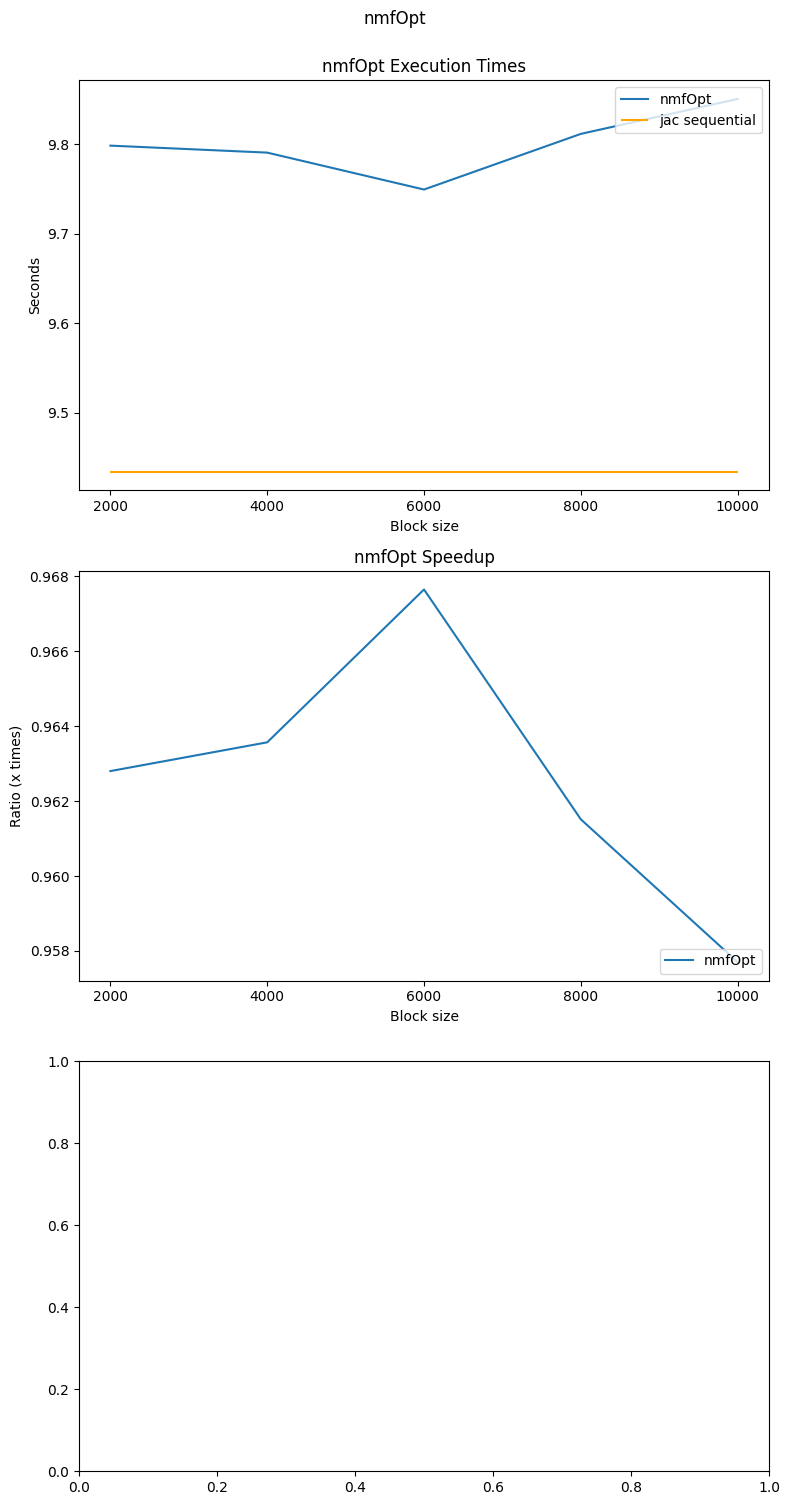

In [27]:
plot_times(adjusted_data_nmfOpt, 'nmfOpt', 'nmfOpt.png')

In [68]:
data_nmfPar = pandas.read_csv('results_nmfPar.csv', delimiter=',', decimal='.')
data_nmfPar

,program,data_set,n,i,t,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/small_data.dat,3,10000,1,1,0.539063,0.530293,0.538470,0.539602,0.539073,0.540409,0.535833
1,nmfPar,./test_data/small_data.dat,3,10000,1,1,0.467834,0.466783,0.470926,0.469701,0.470110,0.469331,0.471778
2,nmfPar,./test_data/small_data.dat,3,10000,1,2,0.369462,0.406339,0.414653,0.374203,0.371437,0.362249,0.373776
3,nmfPar,./test_data/small_data.dat,3,10000,1,3,0.247670,0.265628,0.277338,0.276081,0.269528,0.274025,0.273376
4,nmfPar,./test_data/small_data.dat,3,10000,1,4,0.281410,0.259314,0.305913,0.260079,0.274655,0.259193,0.295095
5,nmfPar,./test_data/small_data.dat,3,10000,1,5,0.289861,0.291521,0.319581,0.238206,0.290719,0.282542,0.295433
6,nmfPar,./test_data/small_data.dat,3,10000,1,6,0.284559,0.318163,0.287948,0.314914,0.286189,0.317706,0.284646
7,nmfPar,./test_data/small_data.dat,3,10000,1,7,0.317453,0.301261,0.344294,0.320543,0.326978,0.299441,0.279701
8,nmfPar,./test_data/small_data.dat,3,10000,1,8,0.330286,0.268090,0.344559,0.300924,0.330209,0.318222,0.315421
9,nmf,./test_data/med_data.dat,6,10000,5,1,9.425645,9.415005,9.423831,9.312160,9.408878,9.410947,9.278698


In [69]:
import math

def calc_mean_and_variance2(df):
    df_cols = ['iter_0', 'iter_1', 'iter_2', 'iter_3', 'iter_4', 'iter_5', 'iter_6']
    df_variance_cols = ['iter_0_variance', 'iter_1_variance', 'iter_2_variance', 'iter_3_variance', \
                        'iter_4_variance', 'iter_5_variance', 'iter_6_variance']

    df['adjusted_mean'] = 0
    df[df_variance_cols] = 0

    for index, row in df.iterrows():
        adjusted_mean = (row[df_cols].sum() - row[df_cols].min() - row[df_cols].max()) / (len(row[df_cols]) - 2)
        df.at[index, 'adjusted_mean'] = adjusted_mean
        
        if index % 9 != 0:
            speedup = df.at[int(index / 9)*9, 'adjusted_mean'] / adjusted_mean
        else:
            speedup = 1
            
        df.at[index, 'speedup'] = speedup
        
        efficiency = speedup / df.at[index, 'num_threads']
        df.at[index, 'efficiency'] = efficiency

    return df



In [85]:
# desired_cols = ['program', 'data_set', 'n', 'i', 't', 'num_threads', 'iter_0', 'iter_1', 'iter_2', \
#                 'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']
desired_cols = ['program', 'data_set', 'n', 'i', 't', 'num_threads', 'adjusted_mean', 'speedup', 'efficiency']

In [86]:
from IPython.display import display

def print_table(data):
    display(data[desired_cols].style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])\
            .set_properties(**{'text-align': 'center'}).hide(axis='index'))

In [87]:
adjusted_data_nmfPar = calc_mean_and_variance2(data_nmfPar)
print_table(adjusted_data_nmfPar)

program,data_set,n,i,t,num_threads,adjusted_mean,speedup,efficiency
nmf,./test_data/small_data.dat,3,10000,1,1,0.538408,1.000000,1.000000
nmfPar,./test_data/small_data.dat,3,10000,1,1,0.469580,1.146573,1.146573
nmfPar,./test_data/small_data.dat,3,10000,1,2,0.379043,1.420439,0.710220
nmfPar,./test_data/small_data.dat,3,10000,1,3,0.271728,1.981426,0.660475
nmfPar,./test_data/small_data.dat,3,10000,1,4,0.274111,1.964201,0.491050
nmfPar,./test_data/small_data.dat,3,10000,1,5,0.290015,1.856483,0.371297
nmfPar,./test_data/small_data.dat,3,10000,1,6,0.298281,1.805039,0.300840
nmfPar,./test_data/small_data.dat,3,10000,1,7,0.313135,1.719411,0.245630
nmfPar,./test_data/small_data.dat,3,10000,1,8,0.319012,1.687734,0.210967
nmf,./test_data/med_data.dat,6,10000,5,1,9.394164,1.000000,1.000000


In [83]:
import matplotlib.pyplot as plt

def plot_times2(adjusted_data, fig_title='', fig_file_name='test.png'):
    seq_small_results = adjusted_data[:1]
    par_small_results = adjusted_data[1:9]
    seq_med_results = adjusted_data[9:10]
    par_med_results = adjusted_data[10:18]
    seq_lg_results = adjusted_data[18:19]
    par_lg_results = adjusted_data[19:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(par_small_results['num_threads'], par_small_results['adjusted_mean'], label=fig_title + ' small')
    axs[0].plot(par_med_results['num_threads'], par_med_results['adjusted_mean'], label=fig_title + ' medium')
    axs[0].plot(par_lg_results['num_threads'], par_lg_results['adjusted_mean'], label=fig_title + ' large')
    axs[0].hlines(y=seq_small_results['adjusted_mean'], xmin=1, xmax=8, colors='orange', label='nmf small')
    axs[0].hlines(y=seq_med_results['adjusted_mean'], xmin=1, xmax=8, colors='purple', label='nmf medium')
    axs[0].hlines(y=seq_lg_results['adjusted_mean'], xmin=1, xmax=8, colors='yellow', label='nmf large')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[0].set_xlabel('Number of threads')
    
    axs[1].plot(par_small_results['num_threads'], par_small_results['speedup'], label=fig_title + ' small') 
    axs[1].plot(par_med_results['num_threads'], par_med_results['speedup'], label=fig_title + ' medium') 
    axs[1].plot(par_lg_results['num_threads'], par_lg_results['speedup'], label=fig_title + ' large') 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[1].set_xlabel('Number of threads')
    
    axs[2].plot(par_small_results['num_threads'], par_small_results['efficiency'], label=fig_title + ' small')  
    axs[2].plot(par_med_results['num_threads'], par_med_results['efficiency'], label=fig_title + ' medium')  
    axs[2].plot(par_lg_results['num_threads'], par_lg_results['efficiency'], label=fig_title + ' large')  
    axs[2].legend(loc='lower left')
    axs[2].set_ylabel('Ratio')
    axs[2].set_title(f"{fig_title} Efficiency")
    axs[2].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[2].set_xlabel('Number of threads')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

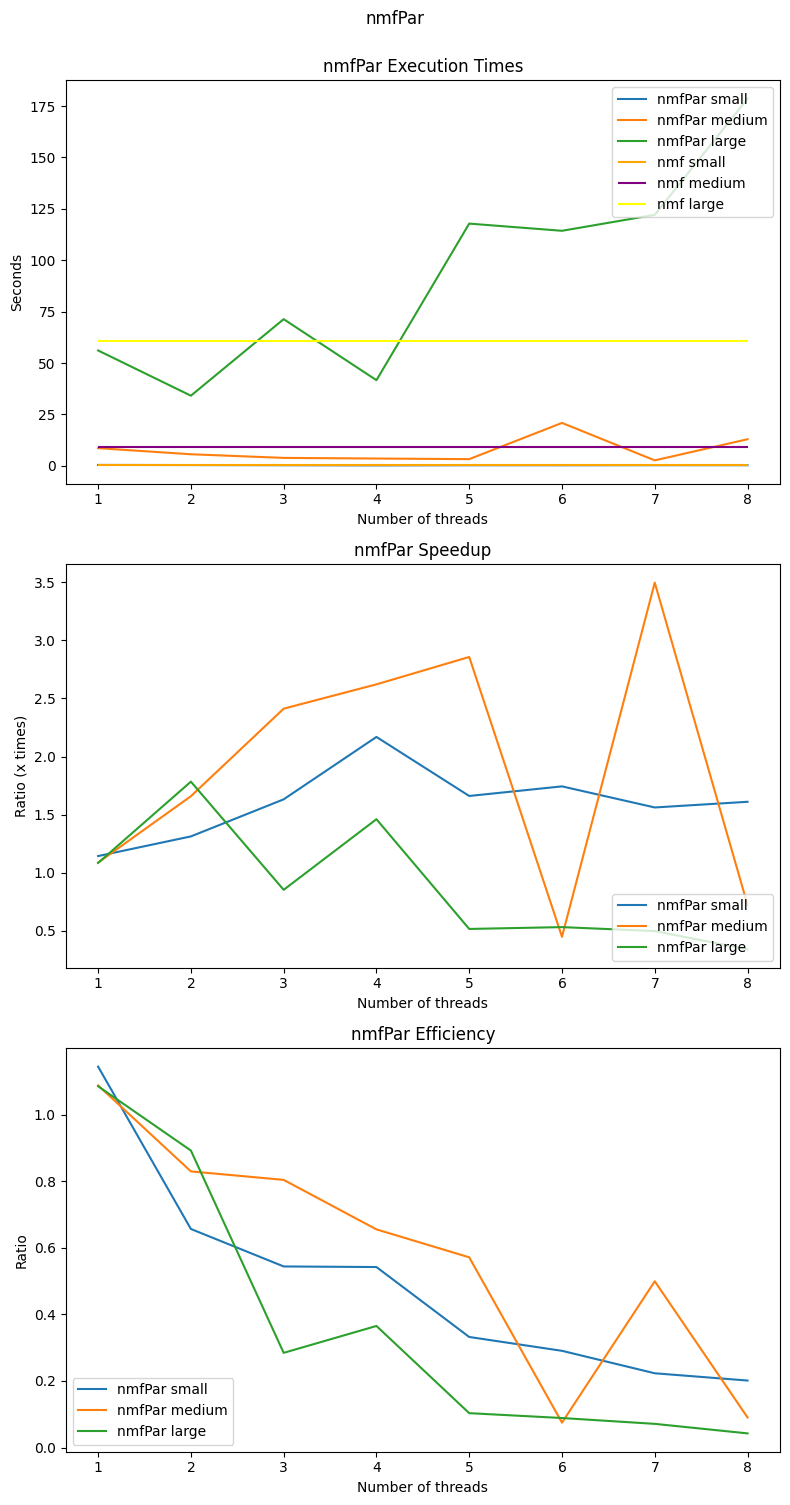

In [84]:
plot_times2(adjusted_data_nmfPar, 'nmfPar', 'nmfPar.png')

In [172]:
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.475997, 0.469976, 0.479149, 0.465488, 0.469640, 0.468710, 0.477976,
# 2 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.389902, 0.379813, 0.389063, 0.370489, 0.369765, 0.369923, 0.386988,
# 3 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.263180, 0.290320, 0.309695, 0.258888, 0.270334, 0.277930, 0.278144,
# 4 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.291743, 0.278793, 0.317191, 0.328368, 0.325504, 0.282743, 0.289111,
# 5 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.279328, 0.261388, 0.298905, 0.319605, 0.259406, 0.264485, 0.288743,
# 6 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.319692, 0.299592, 0.308700, 0.309115, 0.285752, 0.297369, 0.286329,
# 7 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.289180, 0.309343, 0.289034, 0.300522, 0.330632, 0.319819, 0.336268,
# 8 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.293651, 0.286234, 0.319176, 0.299945, 0.314000, 0.304489, 0.377870,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 3 -I 10000 -T 1 -B 50 ./test_data/medium_data.dat
small_thread_1 = [0.475997, 0.469976, 0.479149, 0.465488, 0.469640, 0.468710, 0.477976]
small_thread_2 = [0.389902, 0.379813, 0.389063, 0.370489, 0.369765, 0.369923, 0.386988]
small_thread_3 = [0.263180, 0.290320, 0.309695, 0.258888, 0.270334, 0.277930, 0.278144]
small_thread_4 = [0.291743, 0.278793, 0.317191, 0.328368, 0.325504, 0.282743, 0.289111]
small_thread_5 = [0.279328, 0.261388, 0.298905, 0.319605, 0.259406, 0.264485, 0.288743]
small_thread_6 = [0.319692, 0.299592, 0.308700, 0.309115, 0.285752, 0.297369, 0.286329]
small_thread_7 = [0.289180, 0.309343, 0.289034, 0.300522, 0.330632, 0.319819, 0.336268]
small_thread_8 = [0.293651, 0.286234, 0.319176, 0.299945, 0.314000, 0.304489, 0.377870]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]

# create a list of the small_thread arrays
small_threads = [small_thread_1, small_thread_2, small_thread_3, small_thread_4, small_thread_5, small_thread_6, small_thread_7, small_thread_8]

# call speedup method to calculate speedup for each thread
df_small = calc_speedup(seq, small_threads)

df_small



Sequential Execution time average:  0.5403905999999999


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.00377,0.472,1.145,1.145
1,2,0.00800,0.379,1.426,0.713
2,3,0.00905,0.276,1.958,0.653
3,4,0.01687,0.301,1.795,0.449
4,5,0.01422,0.279,1.937,0.387
5,6,0.00840,0.300,1.801,0.300
6,7,0.01446,0.310,1.743,0.249
7,8,0.00926,0.306,1.766,0.221


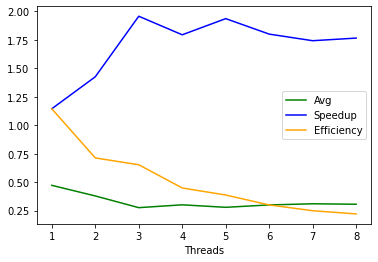

In [173]:
# plot the speedup for the small data set
plot_speedup(df_small)

In [174]:
# 1 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.538243, 8.464680, 8.487537, 8.538164, 8.418820, 8.568965, 8.458268,
# 2 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.648148, 5.642365, 5.867457, 5.684248, 5.689842, 5.719228, 5.649401,
# 3 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.648916, 3.779457, 4.170081, 3.803390, 3.757933, 3.717108, 3.638683,
# 4 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.651067, 3.418536, 3.546629, 3.712093, 3.659100, 3.680510, 3.742778,
# 5 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.231305, 3.027814, 3.143339, 3.329054, 3.358795, 3.217926, 3.223876,
# 6 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 2.910634, 2.510191, 2.799940, 2.929473, 2.935284, 2.879216, 2.546772,
# 7 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 2.866665, 2.908556, 2.591082, 2.815705, 2.833730, 2.725997, 2.733947,
# 8 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 2.799122, 2.617563, 2.690496, 2.924525, 2.368572, 2.676759, 2.719413,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
med_thread_1 = [8.538243, 8.464680, 8.487537, 8.538164, 8.418820, 8.568965, 8.458268]
med_thread_2 = [5.648148, 5.642365, 5.867457, 5.684248, 5.689842, 5.719228, 5.649401]
med_thread_3 = [3.648916, 3.779457, 4.170081, 3.803390, 3.757933, 3.717108, 3.638683]
med_thread_4 = [3.651067, 3.418536, 3.546629, 3.712093, 3.659100, 3.680510, 3.742778]
med_thread_5 = [3.231305, 3.027814, 3.143339, 3.329054, 3.358795, 3.217926, 3.223876]
med_thread_6 = [2.910634, 2.510191, 2.799940, 2.929473, 2.935284, 2.879216, 2.546772]
med_thread_7 = [2.866665, 2.908556, 2.591082, 2.815705, 2.833730, 2.725997, 2.733947]
med_thread_8 = [2.799122, 2.617563, 2.690496, 2.924525, 2.368572, 2.676759, 2.719413]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]

# create a list of the med_thread arrays
med_threads = [med_thread_1, med_thread_2, med_thread_3, med_thread_4, med_thread_5, med_thread_6, med_thread_7, med_thread_8]

# call speedup method to calculate speedup for each thread
df_med = calc_speedup(seq, med_threads)

df_med





Sequential Execution time average:  9.229994600000001


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.03472,8.497,1.086,1.086
1,2,0.02679,5.678,1.626,0.813
2,3,0.05424,3.741,2.467,0.822
3,4,0.05578,3.650,2.529,0.632
4,5,0.05917,3.229,2.858,0.572
5,6,0.14038,2.813,3.281,0.547
6,7,0.05577,2.795,3.302,0.472
7,8,0.05937,2.701,3.417,0.427


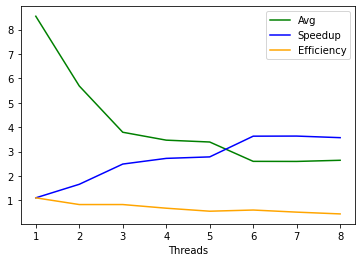

In [144]:
# plot the speedup for the med data set
plot_speedup(df_med)

In [175]:
# 1 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.886715, 54.915751, 54.897536, 54.726244, 54.936808, 57.353634, 54.981831,
# 2 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 33.399511, 33.650100, 34.573299, 33.709799, 33.778305, 33.782513, 33.491664,
# 3 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 24.667373, 23.602714, 23.987172, 24.785897, 24.756095, 24.305968, 24.241583,
# 4 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 19.532490, 18.405351, 18.595131, 18.624777, 18.204848, 19.744337, 18.251814,
# 5 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 15.687021, 16.125246, 14.356825, 15.475588, 15.701489, 15.706347, 15.715463,
# 6 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 14.687140, 15.104392, 14.111317, 15.215858, 14.743148, 15.557099, 15.692076,
# 7 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 14.586053, 14.738371, 14.920757, 14.135876, 14.401036, 14.874820, 13.686997,
# 8 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 14.678901, 14.881626, 14.345333, 14.485342, 14.461378, 14.536097, 14.778809,

# load data into arrays based on number of threads
# 1 threads for nmfPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
large_thread_1 = [54.886715, 54.915751, 54.897536, 54.726244, 54.936808, 57.353634, 54.981831]
large_thread_2 = [33.399511, 33.650100, 34.573299, 33.709799, 33.778305, 33.782513, 33.491664]
large_thread_3 = [24.667373, 23.602714, 23.987172, 24.785897, 24.756095, 24.305968, 24.241583]
large_thread_4 = [19.532490, 18.405351, 18.595131, 18.624777, 18.204848, 19.744337, 18.251814]
large_thread_5 = [15.687021, 16.125246, 14.356825, 15.475588, 15.701489, 15.706347, 15.715463]
large_thread_6 = [14.687140, 15.104392, 14.111317, 15.215858, 14.743148, 15.557099, 15.692076]
large_thread_7 = [14.586053, 14.738371, 14.920757, 14.135876, 14.401036, 14.874820, 13.686997]
large_thread_8 = [14.678901, 14.881626, 14.345333, 14.485342, 14.461378, 14.536097, 14.778809]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

# create a list of the large_thread arrays
large_threads = [large_thread_1, large_thread_2, large_thread_3, large_thread_4, large_thread_5, large_thread_6, large_thread_7, large_thread_8]

# call speedup method to calculate speedup for each thread
df_large = calc_speedup(seq, large_threads)

df_large


Sequential Execution time average:  64.5620894


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.03366,54.924,1.175,1.175
1,2,0.10714,33.682,1.917,0.958
2,3,0.28366,24.392,2.647,0.882
3,4,0.44626,18.682,3.456,0.864
4,5,0.09126,15.657,4.124,0.825
5,6,0.32024,15.062,4.286,0.714
6,7,0.25921,14.547,4.438,0.634
7,8,0.12160,14.588,4.426,0.553


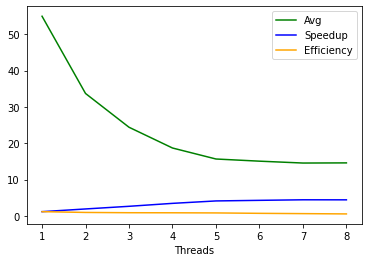

In [177]:
# plot the speedup for the large data set
plot_speedup(df_large)

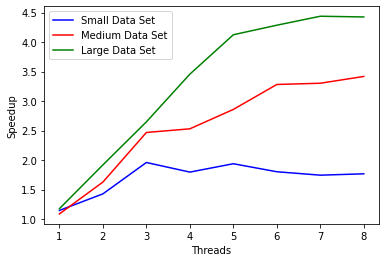

In [178]:
# plot speedup for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Speedup
plt.ylabel('Speedup')
plt.show()

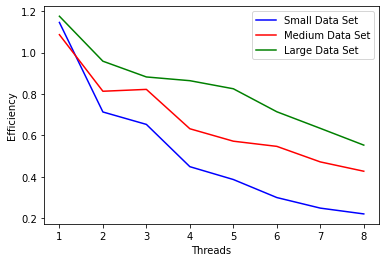

In [179]:
# plot efficiency for both data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Efficiency
plt.ylabel('Efficiency')
plt.show()

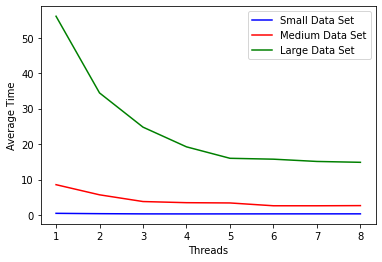

In [97]:
# plot Avg time for both data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Avg', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Avg
plt.ylabel('Average Time')
plt.show()

In [193]:
# 1 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.505721, 0.506758, 0.495494, 0.500659, 0.496677, 0.492704, 0.509462,
# 2 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.404466, 0.409483, 0.409803, 0.405891, 0.405187, 0.430442, 0.409238,
# 3 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.320074, 0.323496, 0.300210, 0.320707, 0.310219, 0.346646, 0.286372,
# 4 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.324567, 0.282178, 0.308187, 0.300948, 0.285245, 0.315168, 0.300033,
# 5 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.297241, 0.280547, 0.296876, 0.289453, 0.302806, 0.290023, 0.329805,
# 6 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.291099, 0.281365, 0.294865, 0.319557, 0.294753, 0.333847, 0.348599,
# 7 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.319171, 0.311091, 0.314202, 0.339526, 0.338099, 0.291459, 0.355810,
# 8 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.336266, 0.318185, 0.297582, 0.318532, 0.310505, 0.310262, 0.349829,

# 1 threads for nmfVec -N 3 -I 10000 -T 1 -B 50 ./test_data/med_data.dat
small_thread_1 = [0.505721, 0.506758, 0.495494, 0.500659, 0.496677, 0.492704, 0.509462]
small_thread_2 = [0.404466, 0.409483, 0.409803, 0.405891, 0.405187, 0.430442, 0.409238]
small_thread_3 = [0.320074, 0.323496, 0.300210, 0.320707, 0.310219, 0.346646, 0.286372]
small_thread_4 = [0.324567, 0.282178, 0.308187, 0.300948, 0.285245, 0.315168, 0.300033]
small_thread_5 = [0.297241, 0.280547, 0.296876, 0.289453, 0.302806, 0.290023, 0.329805]
small_thread_6 = [0.291099, 0.281365, 0.294865, 0.319557, 0.294753, 0.333847, 0.348599]
small_thread_7 = [0.319171, 0.311091, 0.314202, 0.339526, 0.338099, 0.291459, 0.355810]
small_thread_8 = [0.336266, 0.318185, 0.297582, 0.318532, 0.310505, 0.310262, 0.349829]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]

# create a list of the small_thread arrays
small_threads = [small_thread_1, small_thread_2, small_thread_3, small_thread_4, small_thread_5, small_thread_6, small_thread_7, small_thread_8]

# call speedup method to calculate speedup for each thread
df_small = calc_speedup(seq, small_threads)

df_small

Sequential Execution time average:  0.5403905999999999


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.00457,0.501,1.079,1.079
1,2,0.00197,0.408,1.324,0.662
2,3,0.00863,0.315,1.716,0.572
3,4,0.00997,0.302,1.789,0.447
4,5,0.00499,0.295,1.832,0.366
5,6,0.01690,0.307,1.760,0.293
6,7,0.01204,0.324,1.668,0.238
7,8,0.00946,0.319,1.694,0.212


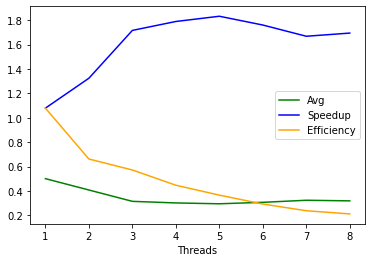

In [194]:
# plot the speedup for the small data set
plot_speedup(df_small)

In [195]:
# 1 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.498323, 8.317165, 8.394748, 8.288113, 8.312578, 8.317875, 8.278911,
# 2 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.700482, 5.770827, 5.655326, 5.781744, 5.688766, 5.803073, 5.661592,
# 3 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.848475, 3.796708, 3.799319, 4.277975, 4.235131, 4.217726, 3.717696,
# 4 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.321486, 3.449708, 3.399031, 3.724985, 3.509468, 3.435799, 3.928061,
# 5 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.279964, 3.297197, 3.658983, 3.238126, 3.499431, 3.264848, 3.519097,
# 6 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 3.098539, 3.033816, 2.944293, 3.062724, 2.653036, 3.198925, 3.044643,
# 7 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 2.761198, 2.828541, 2.919453, 2.818579, 2.705187, 2.998271, 2.842913,
# 8 threads for nmfVec -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 2.588859, 2.530699, 2.796892, 2.955611, 2.888734, 2.838267, 3.088545,

med_thread_1 = [8.498323, 8.317165, 8.394748, 8.288113, 8.312578, 8.317875, 8.278911]
med_thread_2 = [5.700482, 5.770827, 5.655326, 5.781744, 5.688766, 5.803073, 5.661592]
med_thread_3 = [3.848475, 3.796708, 3.799319, 4.277975, 4.235131, 4.217726, 3.717696]
med_thread_4 = [3.321486, 3.449708, 3.399031, 3.724985, 3.509468, 3.435799, 3.928061]
med_thread_5 = [3.279964, 3.297197, 3.658983, 3.238126, 3.499431, 3.264848, 3.519097]
med_thread_6 = [3.098539, 3.033816, 2.944293, 3.062724, 2.653036, 3.198925, 3.044643]
med_thread_7 = [2.761198, 2.828541, 2.919453, 2.818579, 2.705187, 2.998271, 2.842913]
med_thread_8 = [2.588859, 2.530699, 2.796892, 2.955611, 2.888734, 2.838267, 3.088545]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]

# create a list of the med_thread arrays
med_threads = [med_thread_1, med_thread_2, med_thread_3, med_thread_4, med_thread_5, med_thread_6, med_thread_7, med_thread_8]

# call speedup method to calculate speedup for each thread
df_med = calc_speedup(seq, med_threads)

df_med

Sequential Execution time average:  9.229994600000001


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.03602,8.326,1.109,1.109
1,2,0.04725,5.721,1.613,0.806
2,3,0.20256,3.979,2.320,0.773
3,4,0.11617,3.504,2.634,0.658
4,5,0.11263,3.372,2.737,0.547
5,6,0.05121,3.037,3.039,0.507
6,7,0.05089,2.834,3.257,0.465
7,8,0.12426,2.814,3.280,0.410


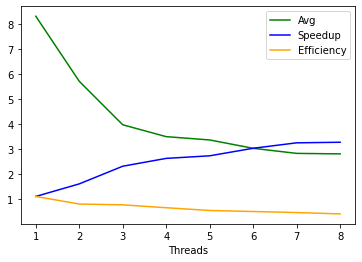

In [197]:
# plot the speedup for the med data set
plot_speedup(df_med)

In [198]:
# 1 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 61.126569, 55.930579, 56.747019, 60.850992, 68.268300, 67.906935, 54.591313,
# 2 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 35.083433, 33.945167, 34.015752, 34.206402, 33.999888, 33.640189, 35.996967,
# 3 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 23.726380, 26.339849, 26.283903, 25.435300, 25.067882, 23.753511, 23.674291,
# 4 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 19.577488, 18.271116, 17.952258, 19.947431, 19.833500, 18.202584, 20.096385,
# 5 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 14.247063, 14.461331, 15.957008, 14.323379, 15.213003, 14.730919, 17.033683,
# 6 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 15.597929, 13.908433, 14.301773, 15.015932, 15.428799, 14.683449, 14.425781,
# 7 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 15.066768, 15.331123, 14.049314, 15.185672, 14.885670, 14.177343, 14.497177,
# 8 threads for nmfVec -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 15.167833, 15.063746, 15.270206, 14.788135, 15.177717, 15.026788, 15.089989,

large_thread_1 = [61.126569, 55.930579, 56.747019, 60.850992, 68.268300, 67.906935, 54.591313]
large_thread_2 = [35.083433, 33.945167, 34.015752, 34.206402, 33.999888, 33.640189, 35.996967]
large_thread_3 = [23.726380, 26.339849, 26.283903, 25.435300, 25.067882, 23.753511, 23.674291]
large_thread_4 = [19.577488, 18.271116, 17.952258, 19.947431, 19.833500, 18.202584, 20.096385]
large_thread_5 = [14.247063, 14.461331, 15.957008, 14.323379, 15.213003, 14.730919, 17.033683]
large_thread_6 = [15.597929, 13.908433, 14.301773, 15.015932, 15.428799, 14.683449, 14.425781]
large_thread_7 = [15.066768, 15.331123, 14.049314, 15.185672, 14.885670, 14.177343, 14.497177]
large_thread_8 = [15.167833, 15.063746, 15.270206, 14.788135, 15.177717, 15.026788, 15.089989]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

# create a list of the large_thread arrays
large_threads = [large_thread_1, large_thread_2, large_thread_3, large_thread_4, large_thread_5, large_thread_6, large_thread_7, large_thread_8]

# call speedup method to calculate speedup for each thread
df_large = calc_speedup(seq, large_threads)

df_large

Sequential Execution time average:  64.5620894


,Threads,STD,Avg,Speedup,Efficiency
0,1,4.25070,60.512,1.067,1.067
1,2,0.42588,34.250,1.885,0.942
2,3,0.99105,24.853,2.598,0.866
3,4,0.76870,19.166,3.369,0.842
4,5,0.59361,14.937,4.322,0.864
5,6,0.40981,14.771,4.371,0.728
6,7,0.37407,14.763,4.373,0.625
7,8,0.05879,15.105,4.274,0.534


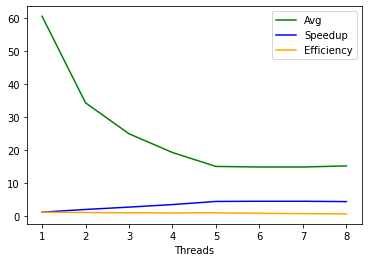

In [199]:
# plot the speedup for the large data set
plot_speedup(df_large)

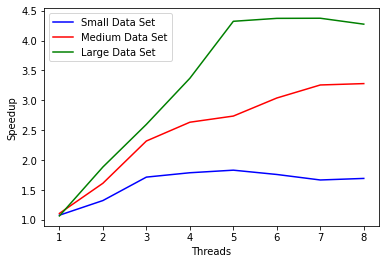

In [200]:
# plot speedup for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Speedup
plt.ylabel('Speedup')
plt.show()

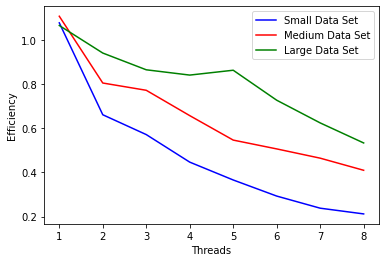

In [201]:
# plot efficiency for both data sets on a single plot
fig, ax = plt.subplots()

df_small.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'blue', ax = ax, label = 'Small Data Set')
df_med.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'red', ax = ax, label = 'Medium Data Set')
df_large.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Efficiency
plt.ylabel('Efficiency')
plt.show()

In [ ]:
# Below are the test runs for nmfOptPar from Karen

In [181]:
# 1 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.471684, 0.468458, 0.460900, 0.465937, 0.478818, 0.475086, 0.465196,
# 2 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.433510, 0.418330, 0.423973, 0.438692, 0.416075, 0.455238, 0.429643,
# 3 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.359964, 0.368721, 0.365050, 0.350574, 0.345388, 0.388821, 0.369882,
# 4 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.370041, 0.359131, 0.373601, 0.365454, 0.351259, 0.395909, 0.349283,
# 5 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.369449, 0.363150, 0.356013, 0.379864, 0.372506, 0.370245, 0.357686,
# 6 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.374236, 0.352657, 0.403810, 0.397141, 0.406488, 0.406064, 0.391472,
# 7 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.399475, 0.386782, 0.383776, 0.369629, 0.401333, 0.398933, 0.389515,
# 8 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 50 ./test_data/small_data.dat
# 0.382674, 0.396270, 0.387418, 0.389965, 0.380143, 0.379437, 0.393222,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 3 -I 10000 -T 1 -B 250 ./test_data/small_data.dat
small_thread_1 = [0.471684, 0.468458, 0.460900, 0.465937, 0.478818, 0.475086, 0.465196]
small_thread_2 = [0.433510, 0.418330, 0.423973, 0.438692, 0.416075, 0.455238, 0.429643]
small_thread_3 = [0.359964, 0.368721, 0.365050, 0.350574, 0.345388, 0.388821, 0.369882]
small_thread_4 = [0.370041, 0.359131, 0.373601, 0.365454, 0.351259, 0.395909, 0.349283]
small_thread_5 = [0.369449, 0.363150, 0.356013, 0.379864, 0.372506, 0.370245, 0.357686]
small_thread_6 = [0.374236, 0.352657, 0.403810, 0.397141, 0.406488, 0.406064, 0.391472]  
small_thread_7 = [0.399475, 0.386782, 0.383776, 0.369629, 0.401333, 0.398933, 0.389515]
small_thread_8 = [0.382674, 0.396270, 0.387418, 0.389965, 0.380143, 0.379437, 0.393222]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]

# create a list of the small_thread arrays
small_threads = [small_thread_1, small_thread_2, small_thread_3, small_thread_4, small_thread_5, small_thread_6, small_thread_7, small_thread_8]

# call speedup method to calculate speedup for each thread
df_opt_par_small = calc_speedup(seq, small_threads)

df_opt_par_small

Sequential Execution time average:  0.5403905999999999


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.00369,0.469,1.152,1.152
1,2,0.00712,0.429,1.260,0.630
2,3,0.00704,0.363,1.489,0.496
3,4,0.00796,0.364,1.485,0.371
4,5,0.00543,0.367,1.472,0.294
5,6,0.01138,0.395,1.368,0.228
6,7,0.00640,0.392,1.379,0.197
7,8,0.00475,0.387,1.396,0.174


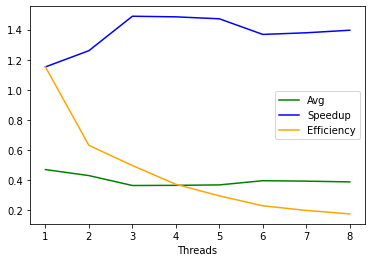

In [183]:
# plot the speedup for the small data set
plot_speedup(df_opt_par_small)

In [184]:
# 1 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 8.348221, 8.450320, 8.348715, 8.269921, 8.358276, 8.298921, 8.308023,
# 2 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 7.418588, 7.189241, 7.189076, 7.273367, 7.253415, 7.181650, 7.129204,
# 3 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 6.027634, 6.534339, 6.425840, 6.076611, 6.181677, 6.365639, 6.164731,
# 4 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.997904, 6.468576, 5.638255, 5.719716, 6.109113, 5.808438, 5.668017,
# 5 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.627866, 5.528205, 5.739355, 5.313503, 5.316778, 5.278209, 5.254673,
# 6 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.229072, 5.633123, 5.298654, 5.280469, 5.369112, 5.315245, 5.509204,
# 7 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.583329, 5.500288, 5.773388, 5.743967, 5.409156, 5.512346, 5.539072,
# 8 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 5.378750, 5.510199, 5.532007, 5.573106, 5.479460, 5.505218, 5.458821,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 6 -I 10000 -T 5 -B 250 ./test_data/med_data.dat
med_opt_par_thread_1 = [8.348221, 8.450320, 8.348715, 8.269921, 8.358276, 8.298921, 8.308023]
med_opt_par_thread_2 = [7.418588, 7.189241, 7.189076, 7.273367, 7.253415, 7.181650, 7.129204]
med_opt_par_thread_3 = [6.027634, 6.534339, 6.425840, 6.076611, 6.181677, 6.365639, 6.164731]
med_opt_par_thread_4 = [5.997904, 6.468576, 5.638255, 5.719716, 6.109113, 5.808438, 5.668017]
med_opt_par_thread_5 = [5.627866, 5.528205, 5.739355, 5.313503, 5.316778, 5.278209, 5.254673]
med_opt_par_thread_6 = [5.229072, 5.633123, 5.298654, 5.280469, 5.369112, 5.315245, 5.509204]
med_opt_par_thread_7 = [5.583329, 5.500288, 5.773388, 5.743967, 5.409156, 5.512346, 5.539072]
med_opt_par_thread_8 = [5.378750, 5.510199, 5.532007, 5.573106, 5.479460, 5.505218, 5.458821]

# create a list of the med_thread arrays
med_threads = [med_opt_par_thread_1, med_opt_par_thread_2, med_opt_par_thread_3, med_opt_par_thread_4, med_opt_par_thread_5, med_opt_par_thread_6, med_opt_par_thread_7, med_opt_par_thread_8]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]

# call speedup method to calculate speedup for each thread
df_opt_par_med = calc_speedup(seq, med_threads)

df_opt_par_med


Sequential Execution time average:  9.229994600000001


,Threads,STD,Avg,Speedup,Efficiency
0,1,0.02409,8.332,1.108,1.108
1,2,0.03822,7.217,1.279,0.640
2,3,0.13118,6.243,1.478,0.493
3,4,0.16749,5.861,1.575,0.394
4,5,0.13912,5.413,1.705,0.341
5,6,0.08281,5.355,1.724,0.287
6,7,0.08879,5.576,1.655,0.236
7,8,0.02543,5.497,1.679,0.210


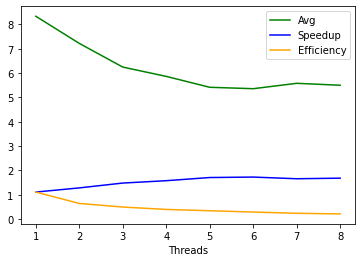

In [185]:
# plot the speedup for the med data set
plot_speedup(df_opt_par_med)

In [186]:
# 1 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 60.344557, 67.326254, 69.812618, 54.793500, 56.151516, 63.431314, 57.861383,
# 2 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 63.594971, 56.474972, 56.261311, 60.670727, 56.976231, 56.420925, 55.860404,
# 3 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 53.265810, 54.367113, 52.580679, 52.691396, 57.004119, 52.559475, 53.458413,
# 4 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 53.267519, 52.540244, 52.509833, 53.317978, 53.465113, 52.881417, 52.240704,
# 5 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 51.839240, 51.275758, 54.946104, 52.476099, 51.282477, 53.172153, 53.120390,
# 6 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 51.668505, 54.826824, 54.345763, 52.720641, 53.736378, 53.792548, 52.067322,
# 7 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.957012, 54.115581, 54.446796, 53.632989, 54.447877, 53.594960, 53.636113,
# 8 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat
# 54.255013, 53.987762, 54.732270, 53.291054, 54.381685, 52.816200, 53.684106,

# load data into arrays based on number of threads
# 1 threads for nmfOptPar -N 10 -I 10000 -T 15 -B 250 ./test_data/large_data.dat

large_opt_par_thread_1 = [60.344557, 67.326254, 69.812618, 54.793500, 56.151516, 63.431314, 57.861383]
large_opt_par_thread_2 = [63.594971, 56.474972, 56.261311, 60.670727, 56.976231, 56.420925, 55.860404]
large_opt_par_thread_3 = [53.265810, 54.367113, 52.580679, 52.691396, 57.004119, 52.559475, 53.458413]
large_opt_par_thread_4 = [53.267519, 52.540244, 52.509833, 53.317978, 53.465113, 52.881417, 52.240704]
large_opt_par_thread_5 = [51.839240, 51.275758, 54.946104, 52.476099, 51.282477, 53.172153, 53.120390]
large_opt_par_thread_6 = [51.668505, 54.826824, 54.345763, 52.720641, 53.736378, 53.792548, 52.067322]
large_opt_par_thread_7 = [54.957012, 54.115581, 54.446796, 53.632989, 54.447877, 53.594960, 53.636113]
large_opt_par_thread_8 = [54.255013, 53.987762, 54.732270, 53.291054, 54.381685, 52.816200, 53.684106]

# create a list of the large_thread arrays
large_threads = [large_opt_par_thread_1, large_opt_par_thread_2, large_opt_par_thread_3, large_opt_par_thread_4, large_opt_par_thread_5, large_opt_par_thread_6, large_opt_par_thread_7, large_opt_par_thread_8]

small_seq = [0.540060, 0.532819, 0.549193, 0.539999, 0.538482, 0.544589, 0.538823]
med_seq = [9.128761, 9.156039, 9.188497, 9.299646, 9.158490, 9.347301, 9.478105]
large_seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

seq = [62.892635, 58.955534, 60.247766, 62.136012, 66.882856, 70.651178, 71.697280]

# call speedup method to calculate speedup for each thread
df_opt_par_large = calc_speedup(seq, large_threads)

df_opt_par_large


Sequential Execution time average:  64.5620894


,Threads,STD,Avg,Speedup,Efficiency
0,1,3.99296,61.023,1.058,1.058
1,2,1.67215,57.361,1.126,0.563
2,3,0.64017,53.273,1.212,0.404
3,4,0.34401,52.903,1.220,0.305
4,5,0.73238,52.378,1.233,0.247
5,6,0.82177,53.333,1.211,0.202
6,7,0.36471,54.056,1.194,0.171
7,8,0.39527,53.920,1.197,0.150


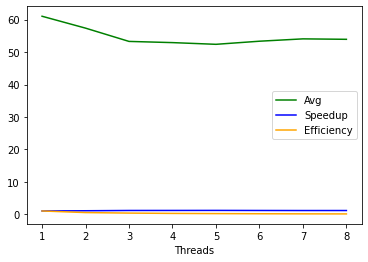

In [187]:
# plot the speedup for the large data set
plot_speedup(df_opt_par_large)

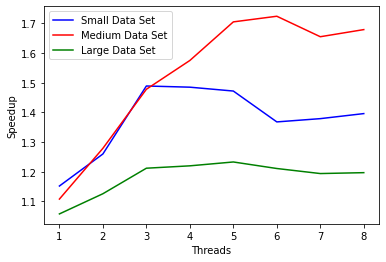

In [188]:
# plot speedup for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_opt_par_small.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax, label = 'Small Data Set')
df_opt_par_med.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'red', ax = ax, label = 'Medium Data Set')
df_opt_par_large.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Speedup
plt.ylabel('Speedup')
plt.show()

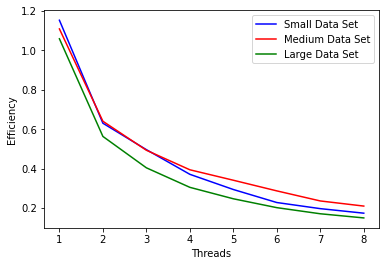

In [189]:
# plot efficiency for the 3 data sets on a single plot
fig, ax = plt.subplots()

df_opt_par_small.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'blue', ax = ax, label = 'Small Data Set')
df_opt_par_med.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'red', ax = ax, label = 'Medium Data Set')
df_opt_par_large.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'green', ax = ax, label = 'Large Data Set')
# label the plot Efficiency
plt.ylabel('Efficiency')
plt.show()

In [ ]:
# Now for the python runs - then a full compare

Python small average:  0.5011314392089844
Python medium average:  3.6739392280578613
Python large average:  17.48420181274414


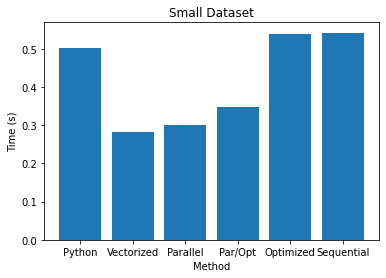

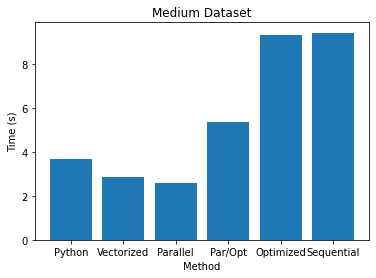

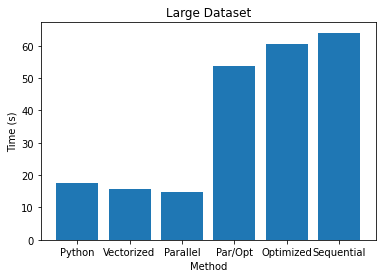

In [204]:
# running python results for the small dataset
py_small = [0.5070266723632812, 0.4975881576538086, 0.5068199634552002, 0.4996986389160156, 0.49875521659851074, 0.4939727783203125, 0.5027952194213867]
py_med = [3.6229870319366455, 3.685049533843994, 3.674145460128784, 3.7608730792999268, 3.7226624488830566, 3.590183734893799, 3.664851665496826]
py_large = [18.093360900878906, 18.20493221282959, 17.50237727165222, 17.16765594482422, 17.54869842529297, 17.108916521072388, 17.056777715682983]

# find the average of each array using the avg method
py_small_avg = avg(py_small)
py_med_avg = avg(py_med)
py_large_avg = avg(py_large)

# print the averages
print("Python small average: ", py_small_avg)
print("Python medium average: ", py_med_avg)
print("Python large average: ", py_large_avg)


small_seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
# find the average of each array using the avg method
small_seq_avg = avg(small_seq)
med_seq_avg = avg(med_seq)
large_seq_avg = avg(large_seq)

small_opt_best = [0.541280, 0.538336, 0.536130, 0.545493, 0.538739, 0.535981, 0.535986] # block size of 50
med_opt_best = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762] # block size of 500
large_opt_best = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910] #block size of 250

# find the average of each array using the avg method nmfOpt
small_opt_best_avg = avg(small_opt_best)
med_opt_best_avg = avg(med_opt_best)
large_opt_best_avg = avg(large_opt_best)

small_par = [0.302140, 0.299616, 0.317576, 0.295622, 0.305130, 0.264368, 0.303575]
med_par = [2.425450, 2.880328, 2.633770, 2.589878, 2.642531, 2.366323, 2.692747]
large_par = [13.803959, 15.287172, 15.474498, 14.905076, 13.822916, 14.998416, 15.268944]

# find the average of each array using the avg method - nmfPar
small_par_avg = avg(small_par)
med_par_avg = avg(med_par)
large_par_avg = avg(large_par)


small_vec = [0.289379, 0.270673, 0.289161, 0.278723, 0.278305, 0.278145, 0.307958] # 6 threads
med_vec = [3.150169, 2.747831, 3.078705, 2.789775, 2.730838, 2.926628, 2.677735] # 7 threads
large_vec = [16.198493, 15.477129, 16.894778, 15.588550, 15.576585, 15.494660, 15.266124] # 7 threads

# find the average of each array using the avg method - nmfVec
small_vec_avg = avg(small_vec)
med_vec_avg = avg(med_vec)
large_vec_avg = avg(large_vec)


small_opt_par = [0.350885, 0.334313, 0.338852, 0.359696, 0.345433, 0.338438, 0.371694] # 5 threads
med_opt_par = [5.677002, 5.440500, 5.337732, 5.223539, 5.208664, 5.178352, 5.767380] # 6 threads
large_opt_par = [54.155870, 53.513522, 54.114519, 53.965311, 52.672863, 53.001031, 53.366085] # 4 threads

# find the average of each array using the avg method - nmfParOpt
small_opt_par_avg = avg(small_opt_par)
med_opt_par_avg = avg(med_opt_par)
large_opt_par_avg = avg(large_opt_par)

# plot a bar chart for the small dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5, 6], [py_small_avg, small_vec_avg, small_par_avg, small_opt_par_avg, small_opt_best_avg, small_seq_avg], tick_label=['Python', 'Vectorized', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Small Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the medium dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5, 6], [py_med_avg, med_vec_avg, med_par_avg, med_opt_par_avg, med_opt_best_avg, med_seq_avg], tick_label=['Python', 'Vectorized', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Medium Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the large dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3, 4, 5, 6], [py_large_avg, large_vec_avg, large_par_avg, large_opt_par_avg, large_opt_best_avg, large_seq_avg], tick_label=['Python', 'Vectorized', 'Parallel', 'Par/Opt', 'Optimized', 'Sequential'])
plt.title('Large Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()


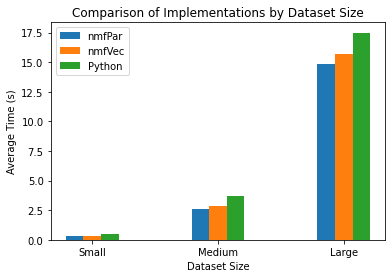

In [205]:
# Averages for each method and dataset size
data = {
    # 'Seq': [small_seq_avg, med_seq_avg, large_seq_avg],
    # 'Opt': [small_opt_best_avg, med_opt_best_avg, large_opt_best_avg],
    # 'nmfOptPar' : [small_opt_par_avg, med_opt_par_avg, large_opt_par_avg],
    'nmfPar': [small_par_avg, med_par_avg, large_par_avg],
    'nmfVec': [small_vec_avg, med_vec_avg, large_vec_avg],
    'Python': [py_small_avg, py_med_avg, py_large_avg]
}

# X-axis labels
dataset_sizes = ['Small', 'Medium', 'Large']

# Number of methods and dataset sizes
num_methods = len(data)
num_dataset_sizes = len(dataset_sizes)

# Bar width and positions
bar_width = 0.14
bar_positions = np.arange(num_dataset_sizes)

# Plot bars for each method
fig, ax = plt.subplots()
for idx, (method, averages) in enumerate(data.items()):
    ax.bar(bar_positions + idx * bar_width, averages, bar_width, label=method)

# Set X-axis ticks and labels
ax.set_xticks(bar_positions + (num_methods - 1) * bar_width / 2)
ax.set_xticklabels(dataset_sizes)

# Set axis labels and title
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Average Time (s)')
ax.set_title('Comparison of Implementations by Dataset Size')

# Add legend
ax.legend()

# Show plot
plt.show()

In [88]:
import matplotlib.pyplot as plt

def plot_times2(adjusted_data, fig_title='', fig_file_name='test.png'):
    seq_small_results = adjusted_data[:1]
    par_small_results = adjusted_data[1:9]
    seq_med_results = adjusted_data[9:10]
    par_med_results = adjusted_data[10:18]
    seq_lg_results = adjusted_data[18:19]
    par_lg_results = adjusted_data[19:]

    fig, axs = plt.subplots(3, figsize=(8, 15))
    
    fig.suptitle(fig_title, y=1)
    
    axs[0].plot(par_small_results['num_threads'], par_small_results['adjusted_mean'], label=fig_title + ' small')
    axs[0].plot(par_med_results['num_threads'], par_med_results['adjusted_mean'], label=fig_title + ' medium')
    axs[0].plot(par_lg_results['num_threads'], par_lg_results['adjusted_mean'], label=fig_title + ' large')
    axs[0].hlines(y=seq_small_results['adjusted_mean'], xmin=1, xmax=8, colors='orange', label='nmf small')
    axs[0].hlines(y=seq_med_results['adjusted_mean'], xmin=1, xmax=8, colors='purple', label='nmf medium')
    axs[0].hlines(y=seq_lg_results['adjusted_mean'], xmin=1, xmax=8, colors='yellow', label='nmf large')
    axs[0].set_ylabel('Seconds')
    axs[0].legend(loc='upper right')
    axs[0].set_title(f"{fig_title} Execution Times")
    axs[0].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[0].set_xlabel('Number of threads')
    
    axs[1].plot(par_small_results['num_threads'], par_small_results['speedup'], label=fig_title + ' small') 
    axs[1].plot(par_med_results['num_threads'], par_med_results['speedup'], label=fig_title + ' medium') 
    axs[1].plot(par_lg_results['num_threads'], par_lg_results['speedup'], label=fig_title + ' large') 
    axs[1].legend(loc='lower right')
    axs[1].set_ylabel('Ratio (x times)')
    axs[1].set_title(f"{fig_title} Speedup")
    axs[1].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[1].set_xlabel('Number of threads')
    
    axs[2].plot(par_small_results['num_threads'], par_small_results['efficiency'], label=fig_title + ' small')  
    axs[2].plot(par_med_results['num_threads'], par_med_results['efficiency'], label=fig_title + ' medium')  
    axs[2].plot(par_lg_results['num_threads'], par_lg_results['efficiency'], label=fig_title + ' large')  
    axs[2].legend(loc='lower left')
    axs[2].set_ylabel('Ratio')
    axs[2].set_title(f"{fig_title} Efficiency")
    axs[2].set_xticks(par_small_results['num_threads'], par_small_results['num_threads'])
    axs[2].set_xlabel('Number of threads')
    
    
    fig.tight_layout()
    
    fig.savefig(fig_file_name, bbox_inches='tight')

In [104]:
data_nmfOptPar = pandas.read_csv('results_nmfOptPar.csv', delimiter=',', decimal='.')
data_nmfOptPar

,program,data_set,n,i,t,blk_size,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/small_data.dat,3,10000,1,50,1,0.536819,0.539107,0.537746,0.535279,0.539563,0.539893,0.538984
1,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,1,0.470900,0.470741,0.469520,0.474536,0.471182,0.470014,0.471579
2,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,2,0.418068,0.466674,0.420997,0.423516,0.421037,0.421305,0.431070
3,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,3,0.388840,0.376224,0.383756,0.391606,0.343057,0.357267,0.370486
4,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,4,0.378306,0.366894,0.406879,0.330646,0.363883,0.386291,0.356601
5,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,5,0.384930,0.353594,0.362801,0.379810,0.359092,0.371555,0.365427
6,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,6,0.373937,0.359150,0.367547,0.390227,0.358795,0.351279,0.392207
7,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,7,0.388244,0.368892,0.420146,0.353870,0.395047,0.388632,0.386942
8,nmfOptPar,./test_data/small_data.dat,3,10000,1,50,8,0.387212,0.359037,0.386867,0.391651,0.398173,0.380689,0.360504
9,nmf,./test_data/med_data.dat,6,10000,5,500,1,9.355644,9.440489,9.407144,9.413807,9.457287,9.275603,9.308050


In [90]:
# desired_cols = ['program', 'num_procs', 'prob_size', 'num_iters', 'buffer_size', 'iter_0', 'iter_1', 'iter_2', \
#                 'iter_3', 'iter_4', 'iter_5', 'iter_6', 'adjusted_mean', 'speedup', 'efficiency']

In [106]:
adjusted_data_nmfOptPar = calc_mean_and_variance2(data_nmfOptPar)
print_table(adjusted_data_nmfOptPar)

program,data_set,n,i,t,blk_size,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup,efficiency
nmf,./test_data/small_data.dat,3,10000,1,50,0.536819,0.539107,0.537746,0.535279,0.539563,0.539893,0.538984,0.538444,1.000000,1.000000
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.470900,0.470741,0.469520,0.474536,0.471182,0.470014,0.471579,0.470883,1.143476,1.143476
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.418068,0.466674,0.420997,0.423516,0.421037,0.421305,0.431070,0.423585,1.271159,0.635579
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.388840,0.376224,0.383756,0.391606,0.343057,0.357267,0.370486,0.375315,1.434647,0.478216
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.378306,0.366894,0.406879,0.330646,0.363883,0.386291,0.356601,0.370395,1.453702,0.363425
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.384930,0.353594,0.362801,0.379810,0.359092,0.371555,0.365427,0.367737,1.464209,0.292842
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.373937,0.359150,0.367547,0.390227,0.358795,0.351279,0.392207,0.369931,1.455524,0.242587
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.388244,0.368892,0.420146,0.353870,0.395047,0.388632,0.386942,0.385551,1.396555,0.199508
nmfOptPar,./test_data/small_data.dat,3,10000,1,50,0.387212,0.359037,0.386867,0.391651,0.398173,0.380689,0.360504,0.381385,1.411813,0.176477
nmf,./test_data/med_data.dat,6,10000,5,500,9.355644,9.440489,9.407144,9.413807,9.457287,9.275603,9.308050,9.385027,1.000000,1.000000


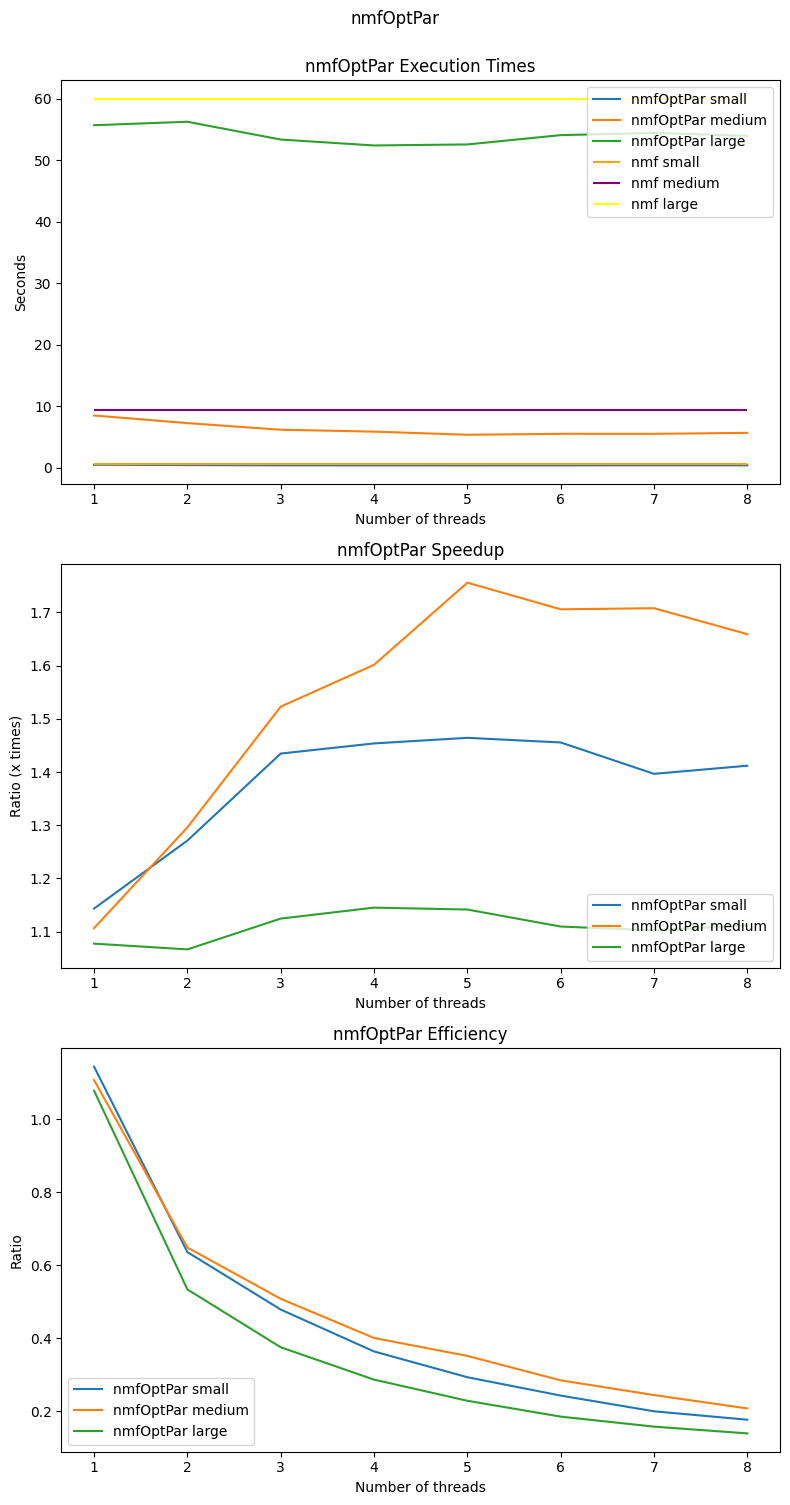

In [107]:
plot_times2(adjusted_data_nmfOptPar, 'nmfOptPar', 'nmfOptPar.png')

In [108]:
data_nmfVec = pandas.read_csv('results_nmfVec.csv', delimiter=',', decimal='.')
data_nmfVec

,program,data_set,n,i,t,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
0,nmf,./test_data/small_data.dat,3,10000,1,1,0.546877,0.549362,0.539457,0.539274,0.536883,0.539512,0.550049
1,nmfVec,./test_data/small_data.dat,3,10000,1,1,0.491133,0.499460,0.495533,0.500113,0.503635,0.496269,0.496391
2,nmfVec,./test_data/small_data.dat,3,10000,1,2,0.384175,0.386272,0.385897,0.389707,0.389674,0.385868,0.407900
3,nmfVec,./test_data/small_data.dat,3,10000,1,3,0.275085,0.277723,0.299865,0.292896,0.339512,0.349026,0.354625
4,nmfVec,./test_data/small_data.dat,3,10000,1,4,0.319687,0.293047,0.266486,0.265094,0.279608,0.291611,0.289386
5,nmfVec,./test_data/small_data.dat,3,10000,1,5,0.279063,0.294706,0.279153,0.274248,0.252108,0.299190,0.280002
6,nmfVec,./test_data/small_data.dat,3,10000,1,6,0.253410,0.266150,0.299685,0.269188,0.261331,0.276130,0.284664
7,nmfVec,./test_data/small_data.dat,3,10000,1,7,0.254249,0.271850,0.279342,0.290364,0.299283,0.270552,0.245190
8,nmfVec,./test_data/small_data.dat,3,10000,1,8,0.277401,0.300133,0.270792,0.296420,0.315730,0.299316,0.290663
9,nmf,./test_data/med_data.dat,6,10000,5,1,9.335824,9.258701,9.318353,9.269005,9.156078,9.215372,9.152726


In [112]:
adjusted_data_nmfVec = calc_mean_and_variance2(data_nmfVec)
print_table(adjusted_data_nmfVec)

program,data_set,n,i,t,num_threads,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,adjusted_mean,speedup,efficiency
nmf,./test_data/small_data.dat,3,10000,1,1,0.546877,0.549362,0.539457,0.539274,0.536883,0.539512,0.550049,0.542896,1.000000,1.000000
nmfVec,./test_data/small_data.dat,3,10000,1,1,0.491133,0.499460,0.495533,0.500113,0.503635,0.496269,0.496391,0.497553,1.091132,1.091132
nmfVec,./test_data/small_data.dat,3,10000,1,2,0.384175,0.386272,0.385897,0.389707,0.389674,0.385868,0.407900,0.387484,1.401082,0.700541
nmfVec,./test_data/small_data.dat,3,10000,1,3,0.275085,0.277723,0.299865,0.292896,0.339512,0.349026,0.354625,0.311804,1.741144,0.580381
nmfVec,./test_data/small_data.dat,3,10000,1,4,0.319687,0.293047,0.266486,0.265094,0.279608,0.291611,0.289386,0.284028,1.911421,0.477855
nmfVec,./test_data/small_data.dat,3,10000,1,5,0.279063,0.294706,0.279153,0.274248,0.252108,0.299190,0.280002,0.281434,1.929034,0.385807
nmfVec,./test_data/small_data.dat,3,10000,1,6,0.253410,0.266150,0.299685,0.269188,0.261331,0.276130,0.284664,0.271493,1.999673,0.333279
nmfVec,./test_data/small_data.dat,3,10000,1,7,0.254249,0.271850,0.279342,0.290364,0.299283,0.270552,0.245190,0.273271,1.986656,0.283808
nmfVec,./test_data/small_data.dat,3,10000,1,8,0.277401,0.300133,0.270792,0.296420,0.315730,0.299316,0.290663,0.292787,1.854239,0.231780
nmf,./test_data/med_data.dat,6,10000,5,1,9.335824,9.258701,9.318353,9.269005,9.156078,9.215372,9.152726,9.243502,1.000000,1.000000


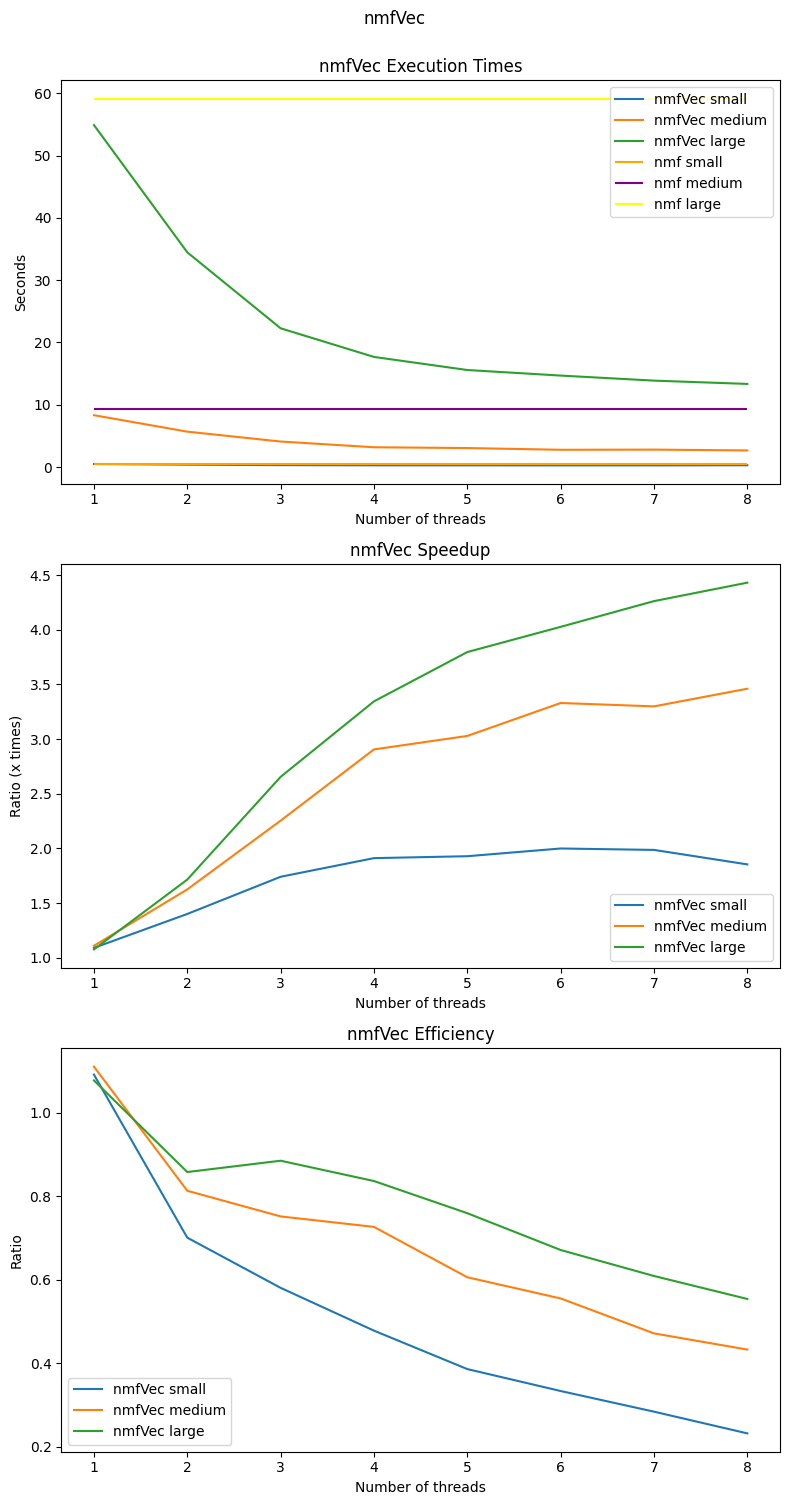

In [113]:
plot_times2(adjusted_data_nmfVec, 'nmfVec', 'nmfVec.png')